# Etude de cas - Analyse des performances d'étudiants

Source du projet -> https://platform.stratascratch.com/data-projects/student-performance-analysis

Le but de ce projet est d'explorer les données des élèves pour découvrir des informations qui pourraient aider à comprendre et à prédire la réussite des élèves au cours de différentes périodes académiques. En tant que contributeur, vous explorerez la relation entre les notes des élèves et une myriade de facteurs démographiques, sociaux et scolaires. Votre analyse aura un impact direct sur notre capacité à identifier et à traiter les influences clés sur les performances des élèves.

## Les tâches :

#### Créer des visualisations de données :

- Générer des histogrammes pour observer la distribution des notes (G1, G2, G3) et d'autres facteurs numériques comme l'âge et le temps d'étude.
- Construire des diagrammes en boîte pour repérer les valeurs aberrantes et comprendre la répartition des données.
- Utiliser des graphiques à barres pour comparer les notes moyennes dans différentes catégories telles que le sexe, le niveau d'éducation des parents et l'accès à Internet.

Vos visualisations doivent aider à mettre en évidence les tendances et les modèles qui peuvent influencer les performances des élèves.

#### Réaliser des tests statistiques :

- Effectuez des tests du chi carré pour étudier l'association entre les variables catégorielles (par exemple, le sexe, l'accès à Internet) et les notes des élèves. Par exemple, existe-t-il une différence statistique dans les notes des élèves ayant des niveaux d'éducation parentale différents ?
- Appliquez des tests t pour comparer les notes moyennes entre deux groupes différents, tels que les élèves des zones urbaines et rurales.
- Utilisez l'analyse de régression pour prédire les notes finales en fonction de divers facteurs tels que le temps d'étude et les échecs passés.

Documentez vos résultats, interprétez les valeurs p et discutez de la signification statistique de vos résultats.

## Objectifs :

- Analyse de corrélation : Déterminez les facteurs les plus fortement corrélés aux notes des élèves.
- Modélisation prédictive : Créez un modèle capable de prédire la note finale d'un élève en fonction de son parcours et de ses activités scolaires.
- Génération d'idées : Fournissez des informations exploitables aux écoles pour les aider à améliorer les résultats des élèves en fonction de vos résultats.

In [1]:
#Importation des outils
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, probplot

In [2]:
#importation des données pour les étudiants en mathématique + création d'une colonne subject qui sera utile pour la fusion
math_students = pd.read_csv('datasetclients/students/student-mat.csv', sep=";")
math_students['subject'] = "Maths"
math_students.columns = math_students.columns.str.lower()

#importation des données pour les étudiants en portugais + création d'une colonne subject qui sera utile pour la fusion
portuguese_students = pd.read_csv('datasetclients/students/student-por.csv', sep=";")
portuguese_students['subject'] = "Portugues"
portuguese_students.columns = portuguese_students.columns.str.lower()

#Fusion des deux dataframe en un seul
df = pd.concat([math_students, portuguese_students])
df

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,freetime,goout,dalc,walc,health,absences,g1,g2,g3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Maths
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Maths
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Maths
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Maths
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Maths
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,Portugues
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,Portugues
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,Portugues
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,Portugues


## Explication des données

Source -> https://www.kaggle.com/datasets/whenamancodes/student-performance

- **school** : L'école où se trouve l'étudiant
- **sex** : Le sexe de l'étudiant
- **age** : L'âge de l'étudiant
- **address** : L'adresse de l'étudiant (U -> Urbain ; R -> Rural)
- **famsize** : La taille de la famille (LE3 -> Moins de 3 ; GT3 -> Plus de 3)
- **Pstatus** : Cohabitation des parents (T -> Ensemble ; A -> Séparés)
- **Medu** : Niveau d'éducation de la mère (0 -> Aucun ; 1 -> CM1 max ; 2 - Brevet max ; 3 - BAC max ; 4 - Au dessus du BAC)
- **Fedu** : Niveau d'éducation du père (0 -> Aucun ; 1 -> CM1 max ; 2 - Brevet max ; 3 - BAC max ; 4 - Au dessus du BAC)
- **Mjob** : Travail de la mère
- **Fjob** : Travail du père
- **reason** : Raison de rejoindre l'école (close to 'home', school 'reputation', 'course' preference or 'other')
- **guardian** : Gardien de l'étudiant (Mère, Père, Autre)
- **traveltime** : Trajet maison -> école (1 -> -15mn ; 2 -> Entre 15 et 30mn ; 3 -> Entre 30mn et 1h ; 4 -> 1h et plus)
- **studytime** : Temps d'étude hebdomadaire (1 -> -2h ; 2 -> 2 à 5h ; 3 -> 5 à 10h ; 4 -> 10h et plus)
- **failures** : Nombre de classes ratées avant d'être ici
- **schoolsup** : Support éducatif en plus (Oui ou non)
- **famsup** : Support éducatif issu de la famille (Oui ou non)
- **paid** : Classes supplémentaires sur les sujets Math ou Portuguais
- **activities** : Activités extrascolaires (oui ou non)
- **nursery** : A été à l'école maternelle (oui ou non)
- **higher** : Souhaite faire plus d'études (oui ou non)
- **internet** : A internet à la maison (oui ou non)
- **romantic** : Est en couple (oui ou non)
- **famrel** : Qualité des relation familiales (1 (mauvais) à 5 (très bon))
- **freetime** : Temps libre après l'école (1 (très peu) - 5 (énormément))
- **goout** : Sorties entre amis (1 (très peu) - 5 (énormément))
- **Dalc** : Alcool en semaine (1 (très peu) - 5 (énormément))
- **Walc** : Alcool le weekend (1 (très peu) - 5 (énormément))
- **health** : Niveau de santé actuel (1 (mauvais) à 5 (très bon))
- **absences** : Nombre d'absences à l'école
- **subject** : La matière (Maths ou Portugues)

Concernant les notes : 

- **G1** ; **G2** ; **G3** : Notes (/20) pour la première, seconde et dernière période scolaire

## Description des données + Nettoyage

Le premier point va être de regrouper et décrire les données, on va également nettoyer au besoin (mettre tous les noms de colonne intégralement en minuscule)

In [3]:
print("Recherche de valeurs nulles")
print("----------------------")
print(df.isna().sum())
print("")
print("----------------------")
print("Description rapide des données")
print("----------------------")
print(df.describe())
print("")
print("----------------------")
print("Information rapide des données")
print("----------------------")
print(df.info())

Recherche de valeurs nulles
----------------------
school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
absences      0
g1            0
g2            0
g3            0
subject       0
dtype: int64

----------------------
Description rapide des données
----------------------
               age         medu         fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000

In [4]:
df.columns = df.columns.str.lower()
df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,freetime,goout,dalc,walc,health,absences,g1,g2,g3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Maths
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Maths
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Maths
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Maths
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Maths


## Visualisation des données

Générer des histogrammes pour observer la distribution des notes (G1, G2, G3) et d'autres facteurs numériques comme l'âge et le temps d'étude.

In [5]:
df_viz = df.copy()

#Fonction pour grouper les notes/sujets entre eux
def group_grades(df, df_col, subject_col=None, grade_range=21):
    
    #On crée une plage complète de note (de 0 à 20)
    full_grades = pd.DataFrame({df_col: range(grade_range)})
    
    #Grouper et compter les notes entre elles
    grade_count = df.groupby(df_col).size().reset_index(name="count")
    
    #Je merge le tableau avec le tableaude notes avec un left join. L'idée est de récupérer 
    #également les notes absentes, et de mettre 0 au compteur
    grade_count = full_grades.merge(grade_count, on=df_col, how="left").fillna(0)
    grade_count["count"] = grade_count["count"].astype(int)

    #Si j'ai un sujet, alors je veux grouper par notes et sujet
    if subject_col:
        #Je récupère les sujets uniques
        unique_subject = df[subject_col].unique()
        
        #Je crée un tableau qui liste tous les couples matières-notes possible entre 0 et 20
        grade_subject = pd.MultiIndex.from_product(
            [range(grade_range), unique_subject], names=[df_col, subject_col]
        ).to_frame(index=False)
        
        #Je regroupe le tout
        grade_count_subject = df.groupby([df_col, subject_col]).size().reset_index(name="count")
        
        grade_count_subject = grade_subject.merge(grade_count_subject, on=[df_col, subject_col], how="left").fillna(0)
        grade_count_subject["count"] = grade_count_subject["count"].astype(int)
        
        return grade_count, grade_count_subject

    return grade_count

g1, g1_subject = group_grades(df_viz, "g1", "subject")
g2, g2_subject = group_grades(df_viz, "g2", "subject")
g3, g3_subject = group_grades(df_viz, "g3", "subject")

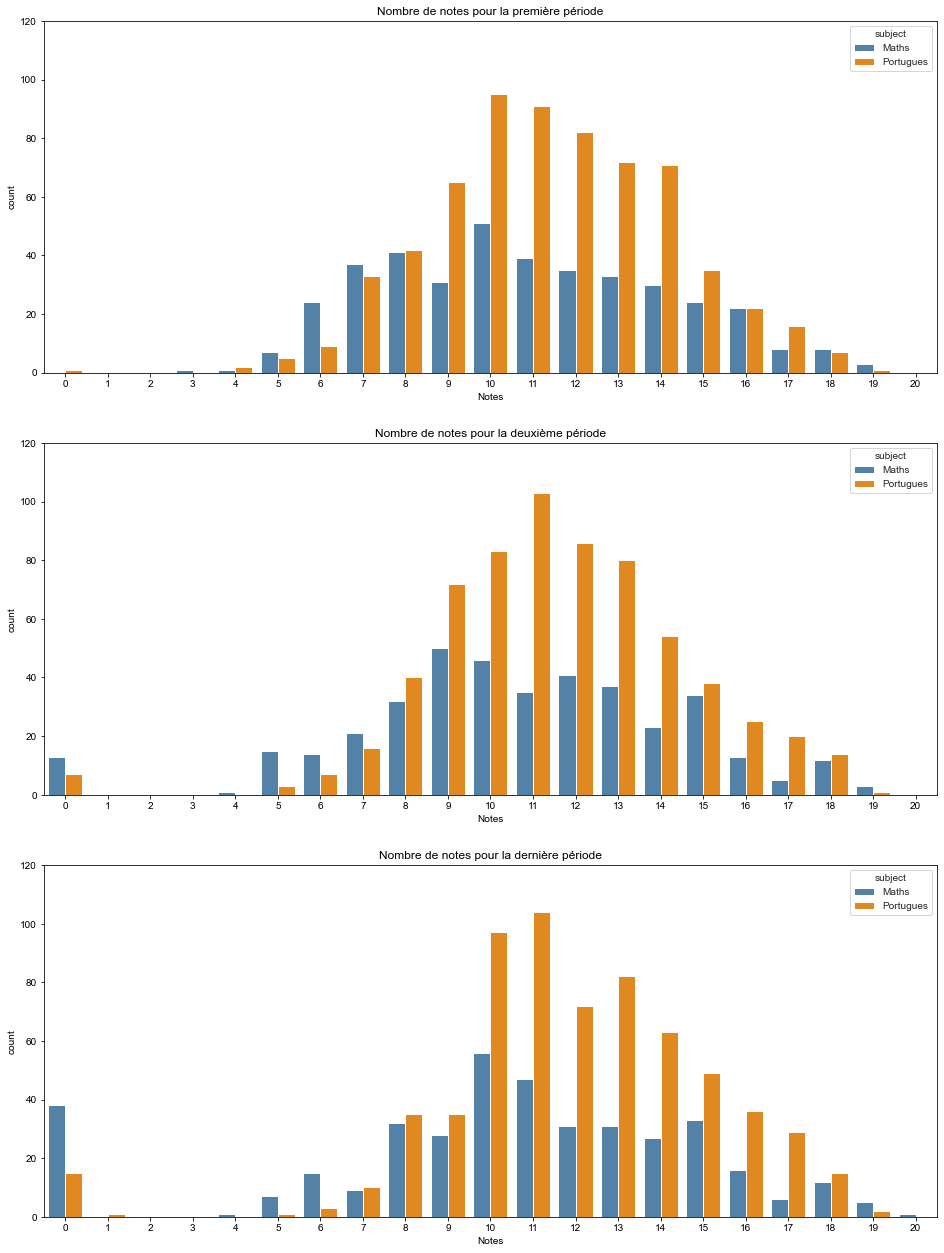

In [6]:
#Création des plots

fig, axes = plt.subplots(3, 1, figsize=(16, 22))
axes = axes.ravel()

sns.set_style("whitegrid")

#Définition des informations : liste des données (les groupements de notes par matières ; les couleurs et les noms de période)
data = [g1_subject, g2_subject, g3_subject]
subject_colors = {'Maths': 'steelblue', 'Portugues': 'darkorange'}
periods = ["première", "deuxième", "dernière"]

#Pour chaque élément dans data, j'affiche un barplot qui compte le nombre de notes, trié par matières
for i in range(3):
    sns.barplot(data=data[i], x=f"g{i+1}", y="count", ax=axes[i], hue="subject", palette=subject_colors)
    axes[i].set_xlabel("Notes")
    axes[i].set_title(f"Nombre de notes pour la {periods[i]} période")
    axes[i].set_ylim(0, 120)

### A ce moment là, je me rends compte que je crée des barplots au lieu d'histogrammes, je vais laisser là parce que je suis fier de ma fonction de groupby

Maintenant, je vais créer les vrais histogrames et y ajouter les boxplots

In [7]:
columns = ['g1', 'g2', 'g3', 'studytime', 'age', 'absences']

sns.set_style("whitegrid")

#Fonction de création d'histogrammes et de boxplots
#Paramètres : le dataframe, la colonne à vérifier, la matière
def create_hist_box(data, col, subject):
    #On définit la taille du subplot grâce à la longueur du tableau, donc 8 lignes, et 2 colonnes
    #La taille de la figure est de 12 et 4*8 donc 32
    fig, axes = plt.subplots(len(col), 2, figsize=(12, 4 * len(col)))
    
    for i, column in enumerate(col):
        sns.histplot(data=data, x=column, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f"Histogramme de la colonne {column} pour la matière {subject}")
        
        sns.boxplot(data=data, x=column, ax=axes[i, 1])
        axes[i, 1].set_title(f"Boxplot de la colonne {column} pour la matière {subject}")
    
    plt.tight_layout()

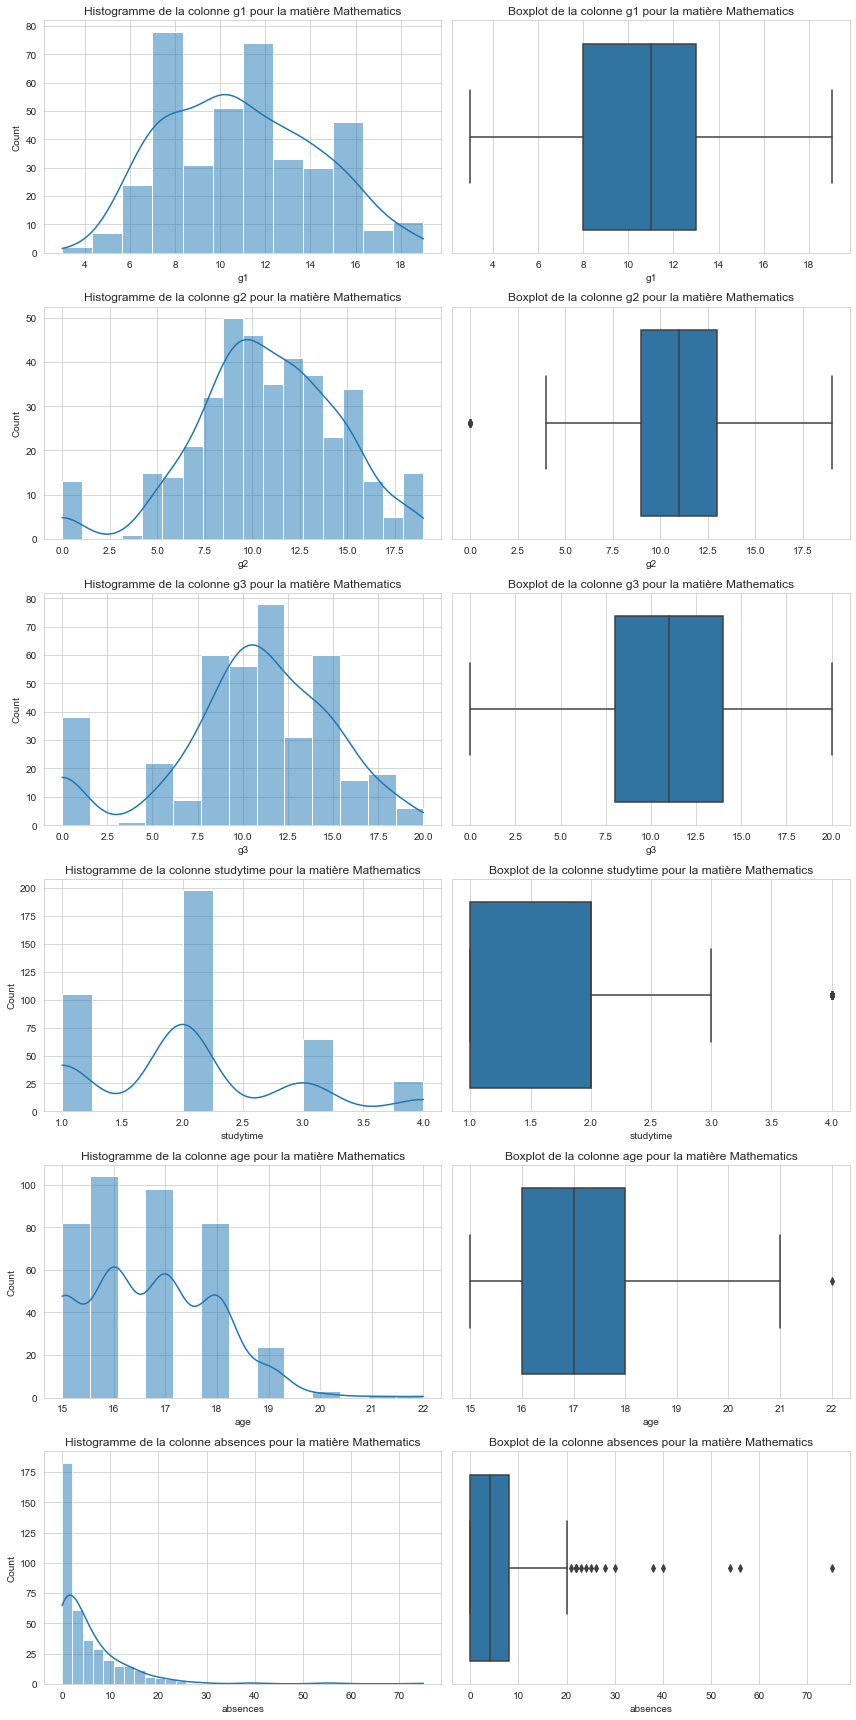

In [8]:
create_hist_box(math_students, columns, "Mathematics")

### Retour sur les plots mathématiques 

- Côté notes, les résultats sont distribués de façon plutôt normale avec quelques données aberrantes en G2/G3
- Les apprenants ont entre 15 et 19 ans, avec quelques personnes de 20 à 22 ans
- Très peu d'abscences en mathématiques
- Le temps d'études est dans la moyenne, avec quelques personnes travaillant plus de 10h/semaine

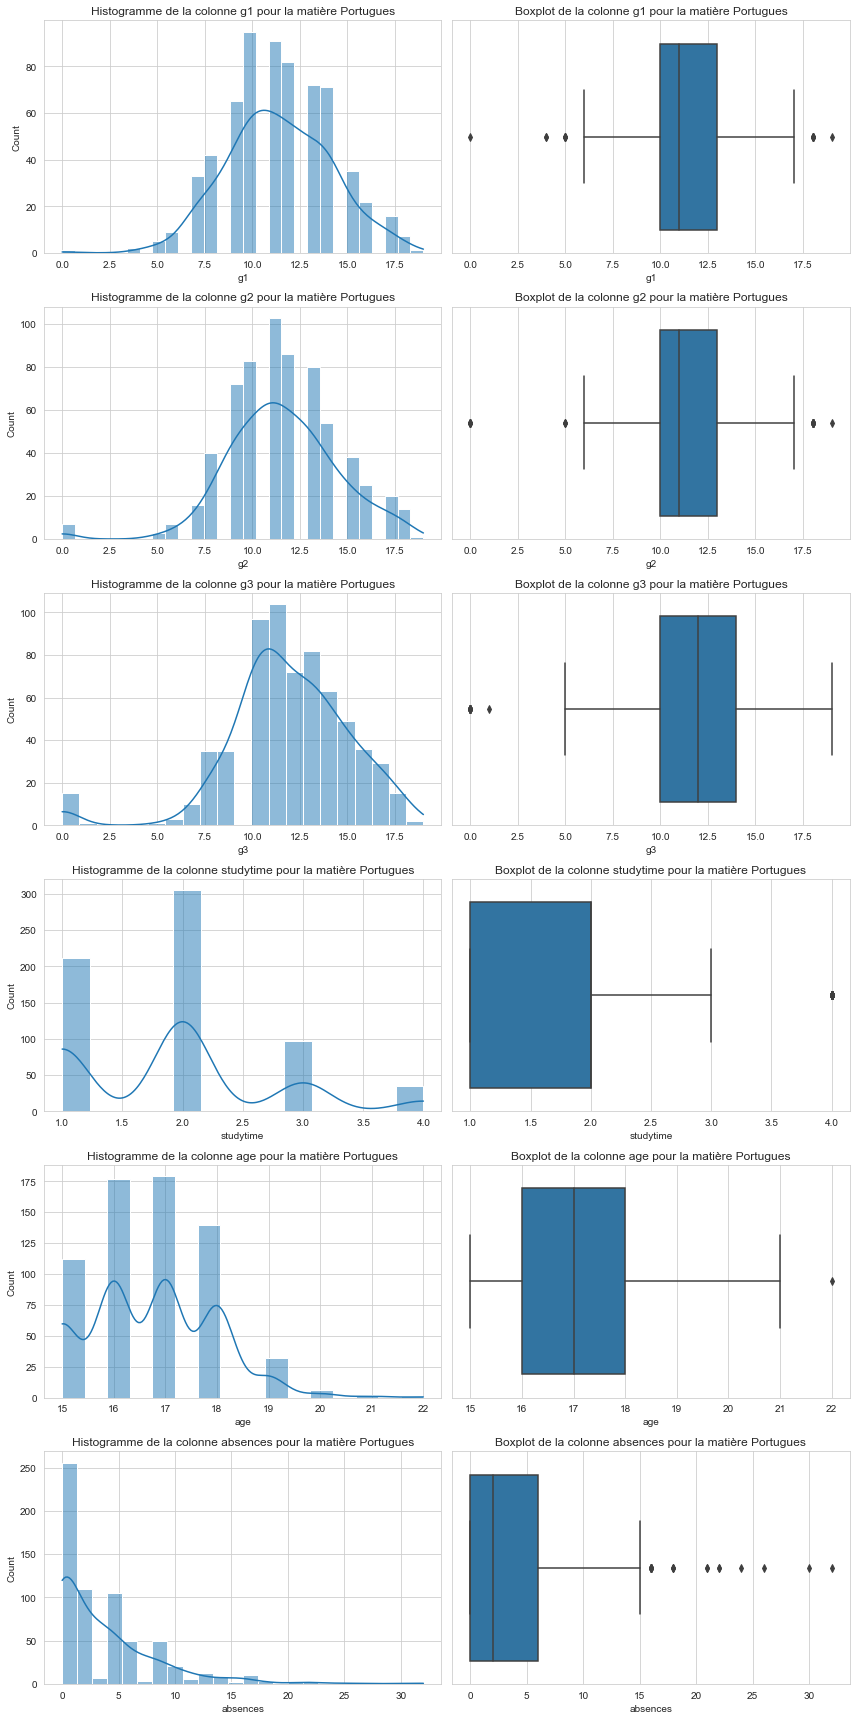

In [9]:
create_hist_box(portuguese_students, columns, "Portugues")

### Retour sur les plots portuguais 

- Côté notes, les notes semblent meilleures que les mathématiques, avec cependant moins de participants
- L'âge est également identique en terme de distribution, avec des apprenants majoritairement entre 15 et 19 ans
- Très peu d'abscences, similaire aux mathématiques
- Le temps d'études est également équivalent au mathématiques, même si il a plus tendance à pencher vers les 2 à 5h de travail hebdomadaire

## Comparaison des moyennes suivant certains critères (sexe, accès à Internet, éducation des parents...)

**Explications de la fonction mel_data** : 

- Regroupement par catégorie (groupby) : Elle regroupe les données par une colonne catégorielle (ex. sex) et calcule la moyenne des notes g1, g2 et g3.

Exemple de résultat après groupby pour la colonne sex :

| sex | g1   | g2   | g3   |
|-----|------|------|------|
| F   | 12.0 | 14.0 | 13.0 |
| M   | 10.0 | 11.0 | 12.0 |

- Transformation (melt) : Elle transforme les colonnes g1, g2, g3 en une colonne nommée Exam. Cela facilite la création de graphiques.

Exemple de résultat après melt :

| sex | Exam | Average Score |
|-----|------|---------------|
| F   | g1   | 12            |
| F   | g2   | 14            |
| F   | g3   | 13            |
| M   | g1   | 10            |
| M   | g2   | 11            |
| M   | g3   | 12            |

- Conversion de type : Les scores moyens sont convertis en entiers (int64).

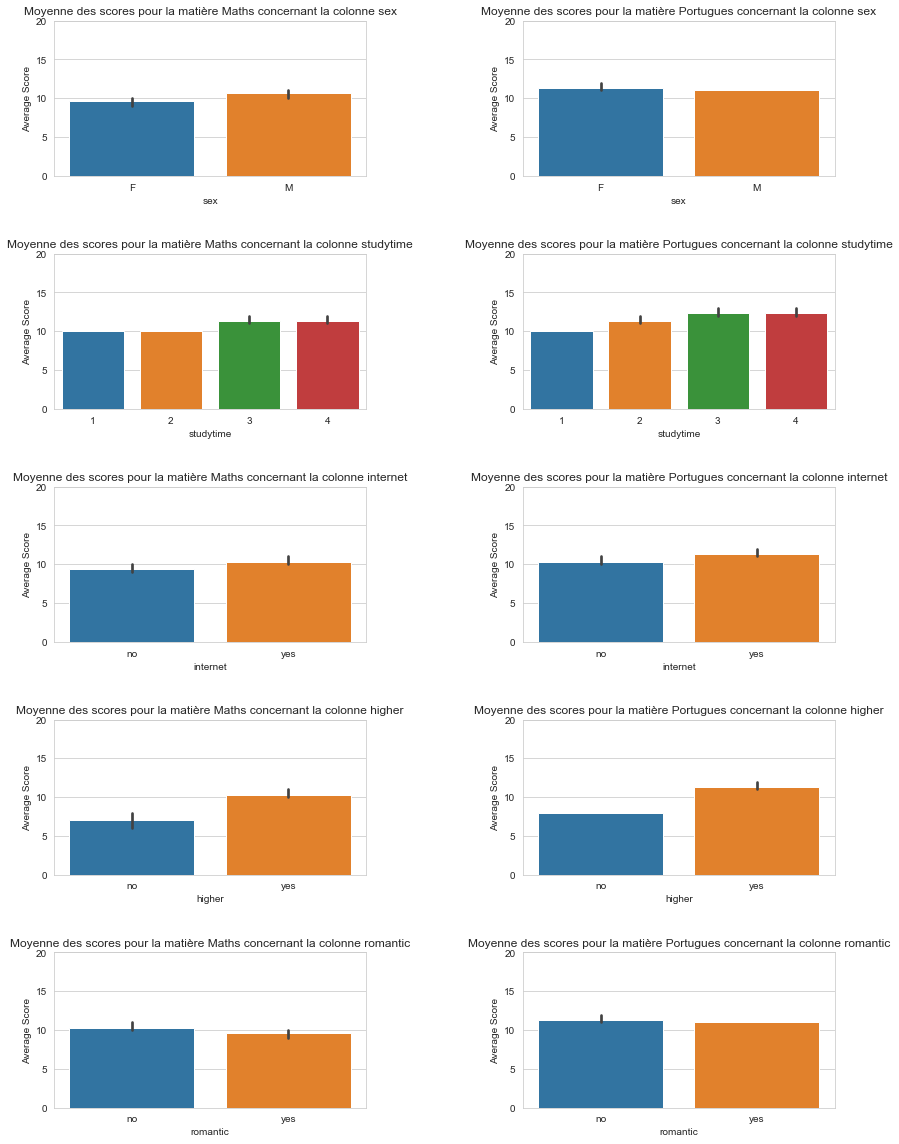

In [22]:
columns = ['sex', 'studytime', 'internet', 'higher', 'romantic']
subjects = ['Maths', 'Portugues']

#Explication de la fonction plus haut
def mel_data(data, col):
    dt = data.groupby(col)[['g1', 'g2', 'g3']].mean().reset_index()
    dt_melted = dt.melt(id_vars=col, var_name='Exam', value_name='Average Score')
    dt_melted['Average Score'] = dt_melted['Average Score'].astype('int64')
    return dt_melted

#Création d'un object result_col qui liste les sujets, j'aurais quelque chose du genre 
#{"Maths": {}, "Portugues": {}}
result_col = {sub: {} for sub in subjects}

#Pour chaque sujet dans le tableau de sujets,
#J'alimente result_col pour chaque sujet dans le tableau columns

#result_col[sub][col] = mel_data(df[df['subject'] == sub], col) -> Applique la fonction mel_data
#Le premier argument est notre dataframe de base, mais je vérifie si la colonne "subject" correspond bien à ma valeur "sub"
#Donc soit Maths soit Portugues. En deuxième paramètre, j'ai la colonne en itération
for sub in subjects:
    for col in columns:
        result_col[sub][col] = mel_data(df[df['subject'] == sub], col)

fig, axes = plt.subplots(len(columns), 2, figsize=(14, 4 * len(columns)))

#Pour chaque sujet, et chaque colonne à l'intérieur de result_col, je crée un barplot
#la donnée est la colonne dans result_col, je vais chercher result_col[subject][col], en x j'ai la colonne choisie, et en y
#La colonne "average score" créée par mel_data. Les axes sont gérés par ma boucle pour afficher les matières cote à cote
for i, subject in enumerate(result_col):
    for j, col in enumerate(result_col[subject]):
        sns.barplot(data=result_col[subject][col], x=col, y="Average Score", ax=axes[j, i])
        axes[j, i].set_title(f"Moyenne des scores pour la matière {subject} concernant la colonne {col}")
        axes[j, i].set_ylim(0, 20)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

## Retour des barplots

- Sexe : Pas de grosses différences entre hommes et femmes
- Studytime : Sans surprise, un temps d'étude plus élevé mène a des moyennes plus élevées
- Internet : Pas une énorme différence de moyennes pour les apprenants ayant internet à la maison ou pas, ça peut s'expliquer par la présence d'internet dans l'établissement scolaire ?
- Higher : Les moyennes sont bien plus élevées si l'apprenant souhaite continuer, ce qui semble également logique
- Romantic : Aucune différence si l'apprenant est en couple ou non, voire une moyenne très légèrement plus élevée si l'apprenant est célibataire

---

## Test statistiques

- Effectuez des tests du chi carré pour étudier l'association entre les variables catégorielles (par exemple, le sexe, l'accès à Internet) et les notes des élèves. Par exemple, existe-t-il une différence statistique dans les notes des élèves ayant des niveaux d'éducation parentale différents ?
- Appliquez des tests t pour comparer les notes moyennes entre deux groupes différents, tels que les élèves des zones urbaines et rurales.
- Utilisez l'analyse de régression pour prédire les notes finales en fonction de divers facteurs tels que le temps d'étude et les échecs passés.

In [27]:
from scipy.stats import chi2_contingency

cols = ['sex', 'studytime', 'internet', 'higher', 'romantic', 'medu', 'fedu', 'schoolsup', 'famsup', 'activities', 'health']

def chisquaretest(dataset, col1, col2):
    #Création d'une table de contingence :
    contain_table = pd.crosstab(dataset[col1], dataset[col2])
    chi2, p, dof, expected = chi2_contingency(contain_table)

    print(f"Test Chi² pour la colonne {column}")
    print(f"Chi²: {chi2}")
    print(f"p-value: {p}")
    
    #Dans le Chi², si la valeur p est inférieure à 0.05 (en général c'est la valeur de base mais elle reste arbitraire)
    #Alors il y a une relation entre les deux colonnes
    if p < 0.05:
        print("/!\ Forte relation !")

### Explication sur la table de contingence (pour ma compréhension perso)

La table de contingence va croiser les données entre elles, et compter les valeurs pour chaque données (exemple, pour la note g3 de 6/20, on compte le nombre de personne avec et sans internet), ça va permettre de voir si il y a un relation entre le fait d'avoir internet et la note g3. Par exemple si beaucoup de personnes n'ont pas internet parmis les personnes ayant des mauvaises notes & très peu parmi ceux qui ont des bonnes notes & que parmis ceux qui ont de bonnes notes, quasiment tous ont internet, on peut estimer que ces variables sont liées
D'où l'intérêt de faire une table de contingence pour un Chi²

In [26]:
#Exemple de table de contingence
pd.crosstab(math_students['internet'], math_students['g3'])

g3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
internet,,,,,,,,,,,,,,,,,,
no,8,0,1,5,3,3,6,12,6,8,4,5,2,0,1,2,0,0
yes,30,1,6,10,6,29,22,44,41,23,27,22,31,16,5,10,5,1


### Chi² Test pour les mathématiques

In [12]:
for column in cols:
    chisquaretest(math_students, column, 'g3')
    print("")

Test Chi² pour la colonne sex
Chi²: 20.094983484728708
p-value: 0.26939988682273464

Test Chi² pour la colonne studytime
Chi²: 59.43163233108963
p-value: 0.19543507371441438

Test Chi² pour la colonne internet
Chi²: 17.94941194705821
p-value: 0.3920390653260132

Test Chi² pour la colonne higher
Chi²: 24.38095284133272
p-value: 0.1094482874216139

Test Chi² pour la colonne romantic
Chi²: 30.172481594103168
p-value: 0.02512766406485856
/!\ Forte relation !

Test Chi² pour la colonne medu
Chi²: 75.09602000056746
p-value: 0.25938557528758116

Test Chi² pour la colonne fedu
Chi²: 69.1210614560398
p-value: 0.43930355096435997

Test Chi² pour la colonne schoolsup
Chi²: 32.51747698036442
p-value: 0.012967250942184287
/!\ Forte relation !

Test Chi² pour la colonne famsup
Chi²: 13.691883206082325
p-value: 0.688779619694134

Test Chi² pour la colonne activities
Chi²: 15.476362071640207
p-value: 0.5612107675941844

Test Chi² pour la colonne health
Chi²: 69.21650199423279
p-value: 0.43611751736038

D'après le retour du test Chi², il y aurait une forte relation entre le fait d'être en couple et le fait de réussir ses examens, même chose pour le support de la famille

In [13]:
for column in cols:
    chisquaretest(portuguese_students, column, 'g3')
    print("")

Test Chi² pour la colonne sex
Chi²: 21.910210365202236
p-value: 0.14611445184701047

Test Chi² pour la colonne studytime
Chi²: 92.70710243112966
p-value: 0.00011439590319883216
/!\ Forte relation !

Test Chi² pour la colonne internet
Chi²: 24.474147027291785
p-value: 0.07964798902533757

Test Chi² pour la colonne higher
Chi²: 106.69706844113018
p-value: 1.8975421776329405e-15
/!\ Forte relation !

Test Chi² pour la colonne romantic
Chi²: 17.00330498225206
p-value: 0.3853832688699261

Test Chi² pour la colonne medu
Chi²: 116.85186784971884
p-value: 6.147265010886306e-05
/!\ Forte relation !

Test Chi² pour la colonne fedu
Chi²: 107.86468915647478
p-value: 0.0005011153421490013
/!\ Forte relation !

Test Chi² pour la colonne schoolsup
Chi²: 24.302749235136933
p-value: 0.08309749991579357

Test Chi² pour la colonne famsup
Chi²: 19.479702828533775
p-value: 0.2445734719811948

Test Chi² pour la colonne activities
Chi²: 21.629573448176266
p-value: 0.15555985667214905

Test Chi² pour la colon

Concernant le portuguais, on a plus de relations pour les résultats :
- Le temps d'étude influence beaucoup la réussite
- Le fait de vouloir faire de plus grandes études
- Le niveau d'étude initial des parents 

## Prédictions

- Analyse de corrélation : Déterminez les facteurs les plus fortement corrélés aux notes des élèves.
- Modélisation prédictive : Créez un modèle capable de prédire la note finale d'un élève en fonction de son parcours et de ses activités scolaires.

<AxesSubplot:>

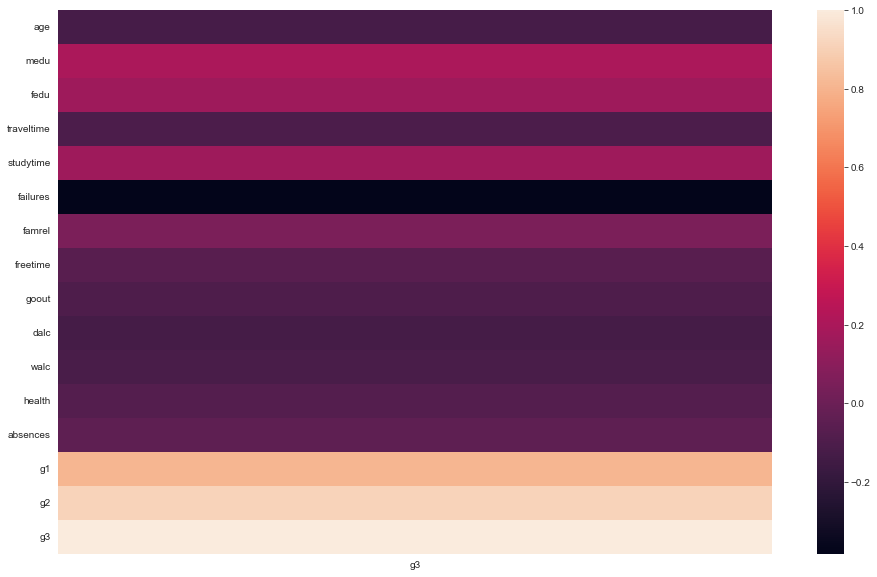

In [14]:
#Voir la correlation entre les notes finales et le reste (heatmap)

plt.figure(figsize=(16,10))
corr = df.corr()[['g3']]

sns.heatmap(corr)

La heatmap permet de définir que seulement la ligne g1 et g2 peuvent être intéressantes pour une prédiction des apprenants

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#y est ma variable dépendante (ou ma cible) c'est la valeur que je cherche à prédire
#X sont mes variables explicatives: Ce sont les variables qui sont utilisées pour expliquer ou prédire la variable cible. 
#Elles influencent ou sont censées avoir un effet sur la variable cible.
X = df[['g1', 'g2']] 
y = df['g3'] 

#Je divise mes variables en ensemble de test et d'entrainement. 20% des données servent à tester, le reste à l'entraînement
#Le random_state est utile pour assurer que le test est reproductible avec les même valeurs
#On peut l'enlever en cas réel ?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Création du modèle avec la LinearRegression de sklearn + entrainement avec les sets xy_train grâce à la fonction fit()
model = LinearRegression()
model.fit(X_train, y_train)

#Une fois que le modèle de régression linéaire a été entraîné sur les données d'entraînement (X_train, y_train)
#il peut maintenant être utilisé pour faire des prédictions sur de nouvelles données. 
#Pour ça, on utilisera X_test, l'ensemble de test qui n'a pas été utilisé pendant l'entraînement du modèle.
#Le résultat de la méthode predict est un tableau de prédictions pour chaque exemple dans X_test. 
#Ces prédictions sont stockées dans la variable y_pred. Ce tableau contient les valeurs estimées de la variable cible (𝑔3)
#pour chaque observation dans l'ensemble de test, selon la relation linéaire trouvée par le modèle pendant l'entraînement.
y_pred = model.predict(X_test)

#On finit par évaluer le modèle en récupérant la MSE (Mean Squared Error) qui 
#mesure l'erreur quadratique moyenne entre les valeurs réelles (y_test) et les valeurs prédites (y_pred
#L'objectif est d'avoir un MSE le plus faible possible, qui assure la qualité du modèle
mse = mean_squared_error(y_test, y_pred)

#Le R² (coefficient de détermination) mesure la proportion de la variance de la variable cible expliquée par le modèle. 
#Il varie de 0 à 1 : un R² proche de 1 indique que le modèle explique bien les données, 
#tandis qu'un R² proche de 0 suggère que le modèle ne parvient pas à expliquer la variance des données
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2.978726475816173
R^2 Score: 0.8073370738614303


Donc par rapport à mes données, un R² score de 0.807 indique un plutôt bon résultat (environ 80,73% de mes données sont expliquées par le modèle)
Le MSE de 2.92 semble également plutôt performant

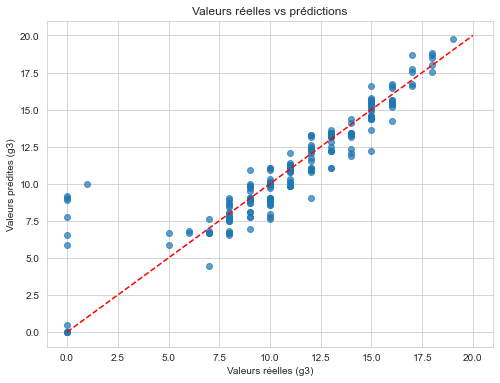

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # Ligne d'identité
plt.xlabel("Valeurs réelles (g3)")
plt.ylabel("Valeurs prédites (g3)")
plt.title("Valeurs réelles vs prédictions")
plt.show()

In [32]:
#Test du modèle sur différentes notes :

notes = [[10, 13],[14, 8],[15, 17],[14, 19],[17, 18]]

predicted_g3_all = model.predict(notes)

for i, pred in enumerate(predicted_g3_all, 1):
    print(f"Étudiant {i} - Note estimée (g3) : {pred:.2f}")

Étudiant 1 - Note estimée (g3) : 12.84
Étudiant 2 - Note estimée (g3) : 8.69
Étudiant 3 - Note estimée (g3) : 17.40
Étudiant 4 - Note estimée (g3) : 19.15
Étudiant 5 - Note estimée (g3) : 18.66


Au vue des résultats, il semblerait même que la valeur G2 a plus d'impact sur le modèle que la valeur G1 ?

## Conclusion

Au vue des résultats des test, il peut être intéressant pour l'école d'accentuer son support des étudiants, les résultats semblent probants pour les mathématiques.
On peut également encourager la recherche d'études supérieures ou d'emploi, il y a une forte correlation et de bien meilleurs résultats pour un apprenant qui sait où il va ensuite.

Créer des programmes spécifiques, des conférences ou masterclass pour les étudiants leurs seront très bénéfique. Accentuer l'apport que peuvent avoir les parents aussi.